In [1]:
%load_ext autoreload
%matplotlib inline
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys


In [3]:
#sys.path.append("../..")
sys.path.append("../../")
sys.path.append("../../WatChMaL")

from analysis.multi_plot_utils import multi_disp_learn_hist, multi_compute_roc, multi_plot_roc
from analysis.comparison_utils import multi_get_masked_data, multi_collapse_test_output


In [4]:
############# define plotting params #############
c = plt.rcParams['axes.prop_cycle'].by_key()['color']
label_dict = {"$\gamma$":0, "$e$":1, "$\mu$":2}
inverse_label_dict = {0:"$\gamma$", 1:"$e$", 2:"$\mu$"}

In [5]:
############# define run locations #############
short_locs = ['/home/jtindall/short_tank/current_short_tank/no_veto_train_full_veto_test/outputs']

short_titles = ['Short Tank']

full_locs = ['/home/jtindall/WatChMaL/outputs/2021-03-01/short_tank_barrel_fix_OD_veto/outputs']

full_titles = ['Short Tank Barrel Fix']

short_linecolor = [c[0] for _ in short_locs]
short_linestyle = ['--' for _ in short_locs]

full_linecolor = [c[1] for _ in full_locs]
full_linestyle = [':' for _ in full_locs]


In [6]:
#fig = multi_disp_learn_hist(mp_locs,losslim=2.5,titles=titles,leg_font=15, title_font=15,xmax=20)

In [7]:
locs = short_locs + full_locs
titles = short_titles + full_titles
linecolor = short_linecolor + full_linecolor
linestyle = short_linestyle + full_linestyle

In [8]:
############# load short tank run data #############
short_idx_file_path = '/fast_scratch/WatChMaL/data/IWCD_mPMT_Short_3M_OD_veto_idxs.npz'
short_indices = np.load(short_idx_file_path)['test_idxs']

short_raw_output_softmax   = [np.load(loc + "/softmax.npy") for loc in short_locs]
short_raw_actual_labels    = [np.load(loc + "/labels.npy") for loc in short_locs]

In [9]:
############# load full tank run data #############
full_idx_file_path = '/fast_scratch/WatChMaL/data/IWCD_mPMT_Short_3M_OD_veto_idxs.npz'
full_indices = np.load(full_idx_file_path)['test_idxs']

full_raw_output_softmax   = [np.load(loc + "/softmax.npy") for loc in full_locs]
full_raw_actual_labels    = [np.load(loc + "/labels.npy") for loc in full_locs]

In [10]:
############# compute short tank multi e/gamma ROC #############
short_fprs, short_tprs, short_thrs = multi_compute_roc(short_raw_output_softmax, short_raw_actual_labels, 
                                     true_label=label_dict["$e$"], 
                                     false_label=label_dict["$\gamma$"])

In [11]:
############# compute long tank multi e/gamma ROC #############
full_fprs, full_tprs, full_thrs = multi_compute_roc(full_raw_output_softmax, full_raw_actual_labels, 
                                     true_label=label_dict["$e$"], 
                                     false_label=label_dict["$\gamma$"])

In [12]:
############# combine short and long results #############
fprs =  short_fprs + full_fprs
tprs = short_tprs + full_tprs
thrs = short_thrs + full_thrs

[<AxesSubplot:>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection '}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]


../../WatChMaL/analysis/plot_utils.py:619: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim(ylim[0],ylim[1])
../../WatChMaL/analysis/plot_utils.py:619: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim(ylim[0],ylim[1])


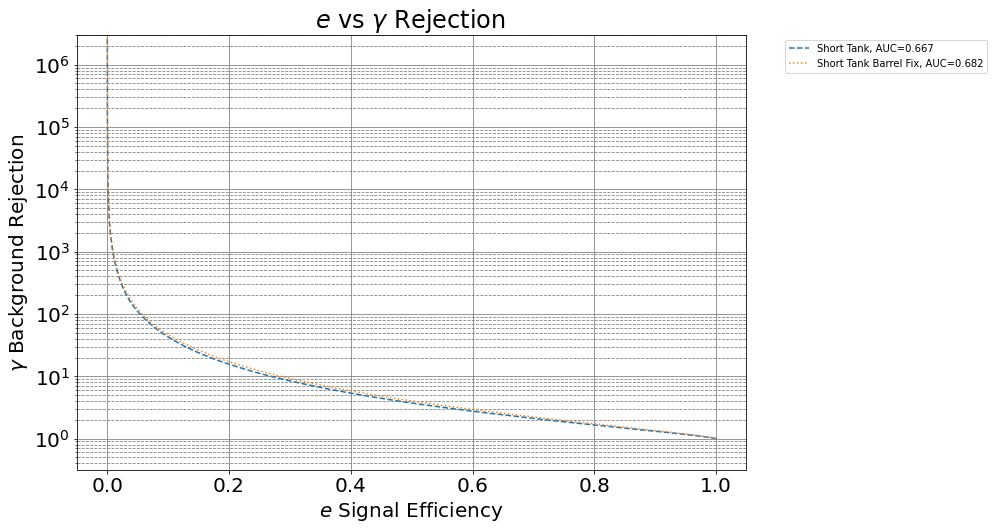

In [13]:
figs = multi_plot_roc(fprs, tprs, thrs, "$e$", "$\gamma$", 
                      fig_list=[1], ylims=[[0,3e6]], 
                      linestyles=linestyle,linecolors=linecolor, 
                      plot_labels=titles, show=False)

[<AxesSubplot:>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection '}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]


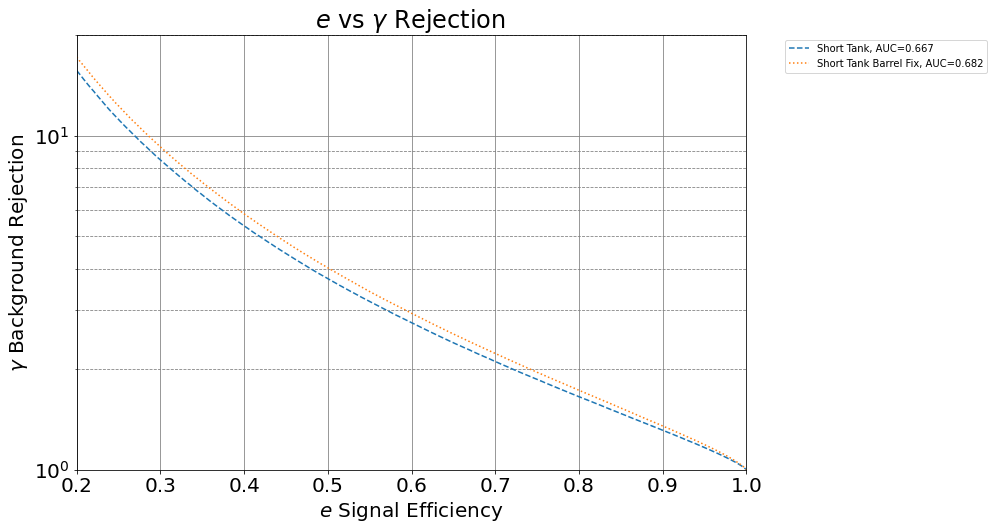

In [14]:
figs = multi_plot_roc(fprs, tprs, thrs, "$e$", "$\gamma$", 
                      fig_list=[1],
                      xlims=[[0.2,1.0]],ylims=[[1e0,2e1]],
                      linestyles=linestyle,linecolors=linecolor, 
                      plot_labels=titles, show=False)

In [15]:
############# compute short multi e/mu ROC #############
short_fprs, short_tprs, short_thrs = multi_compute_roc(short_raw_output_softmax, short_raw_actual_labels, 
                                     true_label=label_dict["$e$"], 
                                     false_label=label_dict["$\mu$"])

In [16]:
############# compute full multi e/mu ROC #############
full_fprs, full_tprs, full_thrs = multi_compute_roc(full_raw_output_softmax, full_raw_actual_labels,
                                     true_label=label_dict["$e$"], 
                                     false_label=label_dict["$\mu$"])

In [17]:
############# combine short and long results #############
fprs =  short_fprs + full_fprs
tprs = short_tprs + full_tprs
thrs = short_thrs + full_thrs

[<AxesSubplot:>]
[<AxesSubplot:title={'center':'$e$ vs $\\mu$ Rejection '}, xlabel='$e$ Signal Efficiency', ylabel='$\\mu$ Background Rejection'>]


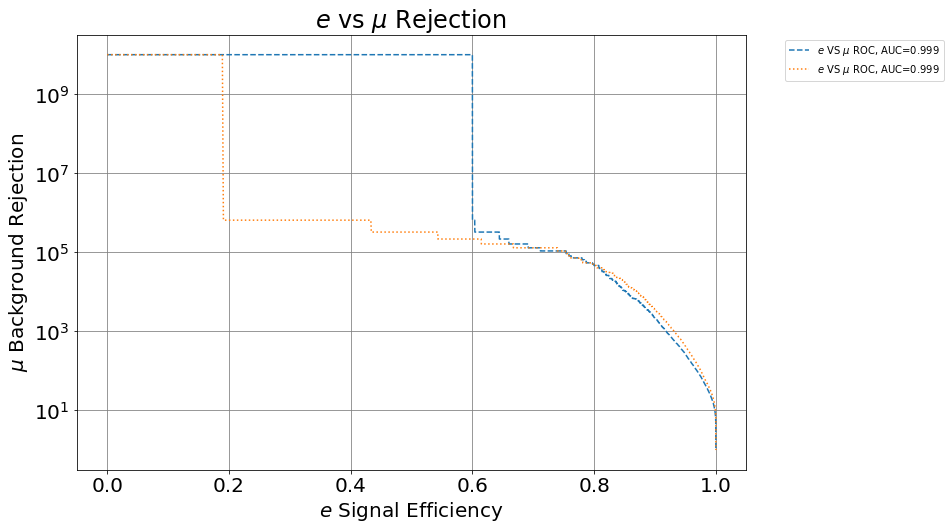

In [18]:
figs = multi_plot_roc(fprs, tprs, thrs, "$e$", "$\mu$", fig_list=[1], 
                      linestyles=linestyle,linecolors=linecolor, show=False)

In [19]:
muon_softmax_index_dict = {"e/gamma":0, "mu":1}

In [20]:
############# compute short collapsed ROC #############
short_collapsed_class_scores_list, short_collapsed_class_labels_list = multi_collapse_test_output(short_raw_output_softmax, short_raw_actual_labels, label_dict, ignore_type='$\gamma$')

short_collapsed_class_labels_list = [collapsed_class_labels - 1 for collapsed_class_labels in short_collapsed_class_labels_list]
short_collapsed_class_scores_list = [collapsed_class_scores[:,1:] for collapsed_class_scores in short_collapsed_class_scores_list]

In [21]:
short_fpr_list, short_tpr_list, short_thr_list = multi_compute_roc(short_collapsed_class_scores_list, short_collapsed_class_labels_list, 
                            true_label=muon_softmax_index_dict["e/gamma"], 
                            false_label=muon_softmax_index_dict["mu"])

In [22]:
############# compute full collapsed ROC #############
full_collapsed_class_scores_list, full_collapsed_class_labels_list = multi_collapse_test_output(full_raw_output_softmax, full_raw_actual_labels, label_dict, ignore_type='$\gamma$')

full_collapsed_class_labels_list = [collapsed_class_labels - 1 for collapsed_class_labels in full_collapsed_class_labels_list]
full_collapsed_class_scores_list = [collapsed_class_scores[:,1:] for collapsed_class_scores in full_collapsed_class_scores_list]

In [23]:
full_fpr_list, full_tpr_list, full_thr_list = multi_compute_roc(full_collapsed_class_scores_list, full_collapsed_class_labels_list, 
                            true_label=muon_softmax_index_dict["e/gamma"], 
                            false_label=muon_softmax_index_dict["mu"])

In [24]:
############# combine short and long results #############
fpr_list = short_fpr_list + full_fpr_list
tpr_list = short_tpr_list + full_tpr_list
thr_list = short_thr_list + full_thr_list

[<AxesSubplot:>]
[<AxesSubplot:title={'center':'e/gamma vs mu Rejection '}, xlabel='e/gamma Signal Efficiency', ylabel='mu Background Rejection'>]


../../WatChMaL/analysis/plot_utils.py:619: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim(ylim[0],ylim[1])
../../WatChMaL/analysis/plot_utils.py:619: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax1.set_ylim(ylim[0],ylim[1])


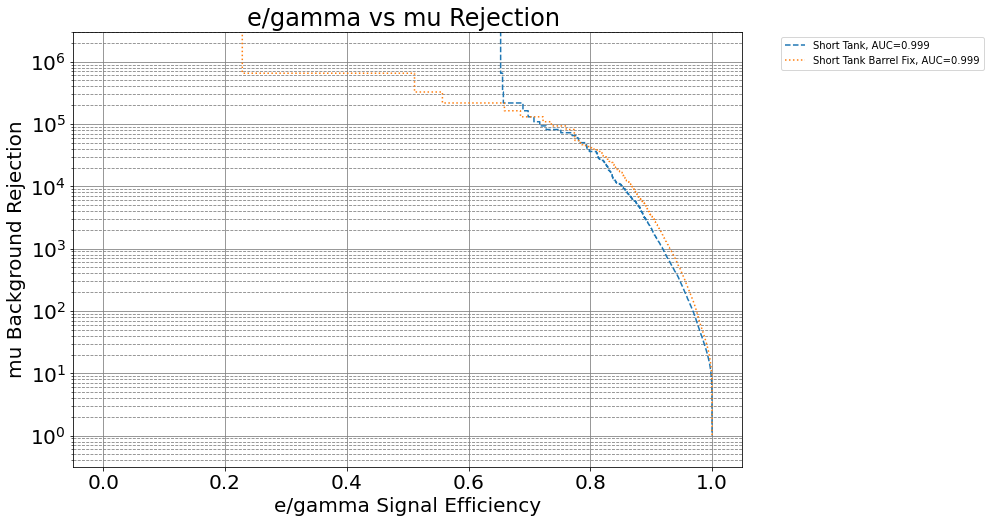

In [25]:
figs = multi_plot_roc(fpr_list, tpr_list, thr_list,"e/gamma", "mu", 
                      fig_list=[1], ylims=[[0,3e6]], 
                      linestyles=linestyle,linecolors=linecolor, plot_labels=titles, show=False)

[<AxesSubplot:>]
[<AxesSubplot:title={'center':'e/gamma vs mu Rejection '}, xlabel='e/gamma Signal Efficiency', ylabel='mu Background Rejection'>]


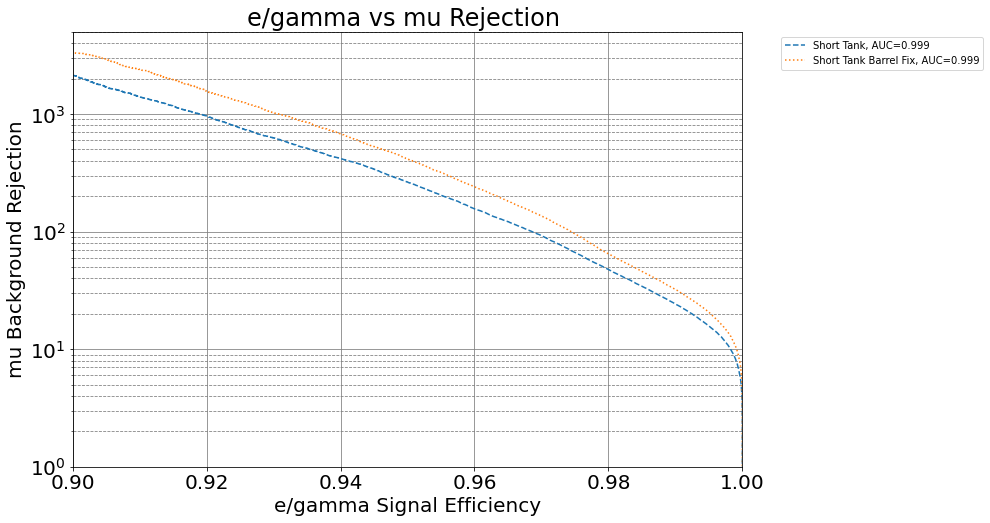

In [26]:
figs = multi_plot_roc(fpr_list, tpr_list, thr_list,"e/gamma", "mu", 
                      fig_list=[1], xlims=[[0.9, 1]], ylims=[[1e0, 5e3]], 
                      linestyles=linestyle,linecolors=linecolor, plot_labels=titles, show=False)